## Testing K Means models for clustering score

This notebook has the objective of test and analyze the different metholodologies of K means application with the help of the evaluation by plotting the clusters and measuring the Sillhouette coefficient

## Visualizing the dataset

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation,KMeans
from sklearn import metrics
import random
import datetime
from itertools import cycle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestCentroid


In [35]:
random.seed(10)

In [2]:
## Import csv
dataset = pd.read_csv('HRDataset_v14.csv')

In [3]:
dataset.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [78]:
dataset[['DOB']]

,DOB
0,07/10/83
1,05/05/75
2,09/19/88
3,09/27/88
4,09/08/89
...,...
306,05/11/85
307,05/04/82
308,08/30/79
309,02/24/79


## Filtering to the 

In [187]:
def string_to_cat(df, column):
    types = []
    for i in list(df[column]):
        if i not in types:
            types.append(i)
    for i in types:
        df[[column]] = df[[column]].replace(i, types.index(i))
        
    return df.copy()
        

In [188]:
def days_to_cat(df):
    unique_list = df.DOB.unique()
    column = 'DOB'
    for i in unique_list:
        df[[column]] = df[[column]].replace(i, (datetime.datetime.utcnow() -  datetime.datetime.strptime(i,'%m/%d/%y')).days//365)
    return df.copy()

In [189]:
## Filtering the desired columns
df = dataset[['EmpID', 'MaritalStatusID', 'GenderID', 'State', 'RaceDesc', 'PositionID', 'CitizenDesc', 'Sex', 'DOB', 'DeptID']]

In [190]:
df = string_to_cat(df, 'State')
df = string_to_cat(df, 'RaceDesc')
df = string_to_cat(df, 'CitizenDesc')
df = string_to_cat(df, 'Sex')

In [191]:
df = days_to_cat(df)

In [192]:
df.head()

,EmpID,MaritalStatusID,GenderID,State,RaceDesc,PositionID,CitizenDesc,Sex,DOB,DeptID
0,10026,0,1,0,0,19,0,0,39,5
1,10084,1,1,0,0,27,0,0,47,3
2,10196,1,0,0,0,20,0,1,33,5
3,10088,1,0,0,0,19,0,1,33,5
4,10069,2,0,0,0,19,0,1,32,5


In [193]:
# Verifying the null values
df.isnull().sum()

EmpID              0
MaritalStatusID    0
GenderID           0
State              0
RaceDesc           0
PositionID         0
CitizenDesc        0
Sex                0
DOB                0
DeptID             0
dtype: int64

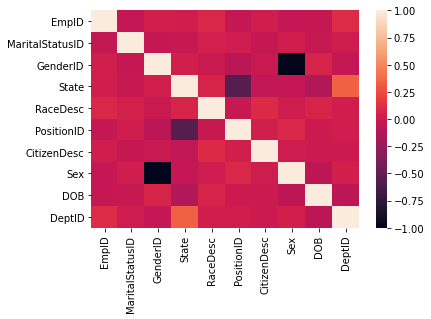

In [194]:
# Ploting correlations
corr = df.corr()
sns.heatmap(corr)
plt.show()

## Applying Affinity Propagation

In [305]:
## Applying Affinity Propagation
reduced_data = PCA(n_components=2).fit_transform(df)
af = AffinityPropagation().fit(reduced_data)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
labels_true = [0, 0, 1, 1]
n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
# print(
#     "Adjusted Mutual Information: %0.3f"
#     % metrics.adjusted_mutual_info_score(labels_true, labels)
# )
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(reduced_data, labels, metric="sqeuclidean")
)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Estimated number of clusters: 13
Silhouette Coefficient: 0.653


## Elbow method

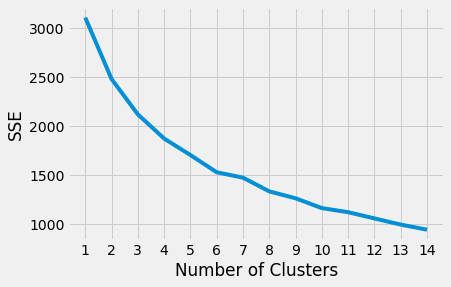

In [310]:
sse = []
transformer = StandardScaler().fit(df)
df2 = transformer.transform(df)
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

 ## KMeans

Silhouetter Score: 0.507


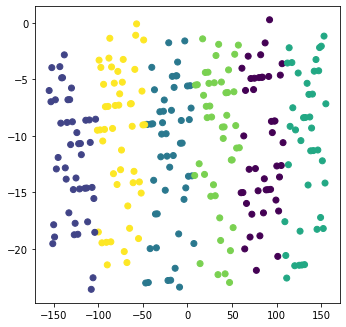

In [296]:
plt.figure(figsize=(12, 12))
reduced_data = PCA(n_components=2).fit_transform(df)
reduced_data = reduced_data[reduced_data[:, -1] < 40]

km = KMeans(n_clusters=6)
y_pred = km.fit_predict(reduced_data)

X = reduced_data

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)


score = metrics.silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

# Anisotropicly distributed data


plt.show()

## Kmeans with Scalator

Silhouetter Score: 0.521


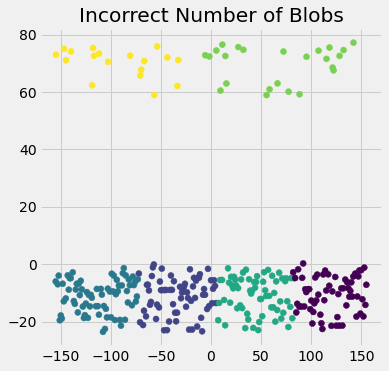

In [324]:
plt.figure(figsize=(12, 12))
transformer = StandardScaler().fit(df)
df2 = transformer.transform(df)

reduced_data = PCA(n_components=2).fit_transform(df)


km = KMeans(n_clusters=6)
y_pred = km.fit_predict(reduced_data)

X = reduced_data
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")


# Anisotropicly distributed data


plt.show()

## Getting the closest five elements

In [334]:
df

,EmpID,MaritalStatusID,GenderID,State,RaceDesc,PositionID,CitizenDesc,Sex,DOB,DeptID
0,10026,0,1,0,0,19,0,0,39,5
1,10084,1,1,0,0,27,0,0,47,3
2,10196,1,0,0,0,20,0,1,33,5
3,10088,1,0,0,0,19,0,1,33,5
4,10069,2,0,0,0,19,0,1,32,5
...,...,...,...,...,...,...,...,...,...,...
306,10135,0,1,0,0,20,0,0,37,5
307,10301,0,0,0,3,19,0,1,40,5
308,10010,0,0,0,0,6,0,1,42,3
309,10043,0,0,0,0,9,0,1,43,3


In [337]:
centers = km.cluster_centers_
point = [[-100, -10]]
dist_centers = []
for c in centers:
    d = np.linalg.norm(point - c)
    dist_centers.append(d)
    
m = min(dist_centers)
cluster = dist_centers.index(m)


closest_centers = []

for i in reduced_data:
    dist_centers = []
    for c in centers:
        d = np.linalg.norm(i - c)
        dist_centers.append(d)
    m = min(dist_centers)
    nearest_cluster = dist_centers.index(m)
    closest_centers.append(nearest_cluster)
    
dists_from_point = []
for i in reduced_data:
    d = np.linalg.norm(i - point)
    dists_from_point.append(d)
    

index_sorted = sorted(range(len(dists_from_point)), key=lambda k: dists_from_point[k])

five_closest_points = []

for i in index_sorted:
    if len(five_closest_points) < 5 and closest_centers[i] == cluster:
        five_closest_points.append(df.iloc[i][["EmpID"]])


In [338]:
five_closest_points

[EmpID    10257
 Name: 101, dtype: int64,
 EmpID    10254
 Name: 194, dtype: int64,
 EmpID    10259
 Name: 213, dtype: int64,
 EmpID    10251
 Name: 165, dtype: int64,
 EmpID    10253
 Name: 291, dtype: int64]